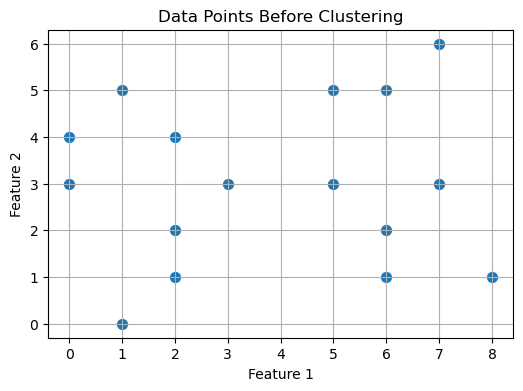

Vertices selected: [(2, 1), (1, 0)]


Distances Matrix:
[3.605551275463989, 4.123105625617661]
[2.8284271247461903, 3.1622776601683795]
[4.123105625617661, 5.0]
[3.0, 4.123105625617661]
[2.23606797749979, 3.605551275463989]
[1.0, 2.23606797749979]
[0.0, 1.4142135623730951]
[1.4142135623730951, 0.0]
[5.0, 6.4031242374328485]
[5.656854249492381, 7.0710678118654755]
[7.0710678118654755, 8.48528137423857]
[3.605551275463989, 5.0]
[5.385164807134504, 6.708203932499369]
[4.123105625617661, 5.385164807134504]
[4.0, 5.0990195135927845]
[6.0, 7.0710678118654755]

Membership Matrix U:
[0.5666666666666667, 0.4333333333333333]
[0.5555555555555556, 0.4444444444444444]
[0.5952380952380952, 0.40476190476190477]
[0.6538461538461539, 0.34615384615384615]
[0.7222222222222222, 0.2777777777777778]
[0.8333333333333334, 0.16666666666666663]
[1, 0]
[0, 1]
[0.6212121212121212, 0.3787878787878788]
[0.6097560975609756, 0.3902439024390244]
[0.5901639344262294, 0.4098360655737705]
[0.6578947368421053, 0.342105263

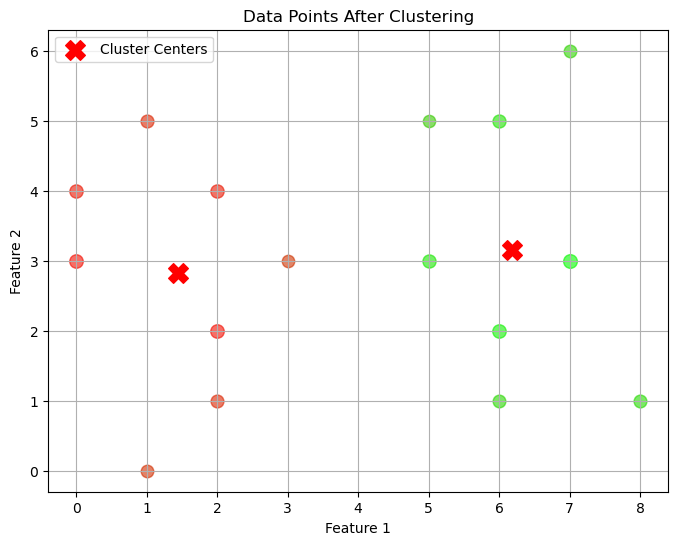

Data Point 1: 8.13% in Cluster 1, 91.87% in Cluster 2
Data Point 2: 5.20% in Cluster 1, 94.80% in Cluster 2
Data Point 3: 13.99% in Cluster 1, 86.01% in Cluster 2
Data Point 4: 8.52% in Cluster 1, 91.48% in Cluster 2
Data Point 5: 19.64% in Cluster 1, 80.36% in Cluster 2
Data Point 6: 5.07% in Cluster 1, 94.93% in Cluster 2
Data Point 7: 14.20% in Cluster 1, 85.80% in Cluster 2
Data Point 8: 18.21% in Cluster 1, 81.79% in Cluster 2
Data Point 9: 78.47% in Cluster 1, 21.53% in Cluster 2
Data Point 10: 88.18% in Cluster 1, 11.82% in Cluster 2
Data Point 11: 82.41% in Cluster 1, 17.59% in Cluster 2
Data Point 12: 90.03% in Cluster 1, 9.97% in Cluster 2
Data Point 13: 97.78% in Cluster 1, 2.22% in Cluster 2
Data Point 14: 94.00% in Cluster 1, 6.00% in Cluster 2
Data Point 15: 83.75% in Cluster 1, 16.25% in Cluster 2
Data Point 16: 85.33% in Cluster 1, 14.67% in Cluster 2


In [11]:
import matplotlib.pyplot as plt
import random

def calculate_euclidean_distance(x1, x2):
    return ((x1[0] - x2[0]) ** 2 + (x1[1] - x2[1]) ** 2) ** 0.5

def calculate_distances(data, centers):
    n_samples = len(data)
    n_clusters = len(centers)
    distances = [[0 for _ in range(n_clusters)] for _ in range(n_samples)]

    for i in range(n_samples):
        for j in range(n_clusters):
            distances[i][j] = calculate_euclidean_distance(data[i], centers[j])
    
    print("\n\nDistances Matrix:")
    for row in distances:
        print(row)
    
    return distances

def update_membership_matrix(distances, m):
    num_data_points = len(distances)
    num_clusters = len(distances[0])  

    U = [[0 for _ in range(num_clusters)] for _ in range(num_data_points)]

    for i in range(num_data_points):
        for j in range(num_clusters):
            denominator = 0.0
            for k in range(num_clusters):
                if distances[i][k] == 0:
                # Handle the case when data point i and cluster center k coincide
                    if j == k:
                        U[i][j] = 1
                    else:
                        U[i][j] = 0
                    break
                denominator += (distances[i][j] / distances[i][k]) ** (2 / (m - 1))
            else:
                # If the loop completes without encountering 'break', then assign the membership value
                U[i][j] = 1 / denominator

    print("\nMembership Matrix U:")
    for row in U:
        print(row)

    return U

def update_cluster_centers(data, U, m):
    # Update cluster centers V based on data and membership matrix U
    n_clusters = len(U[0])
    V = [[0, 0] for _ in range(n_clusters)]

    for i in range(n_clusters):
        numerator_sum_x = numerator_sum_y = 0
        denominator_sum = 0
        for j in range(len(data)):
            u_m = U[j][i] ** m
            numerator_sum_x += u_m * data[j][0]
            numerator_sum_y += u_m * data[j][1]
            denominator_sum += u_m

        V[i][0] = numerator_sum_x / max(denominator_sum, 1e-8)
        V[i][1] = numerator_sum_y / max(denominator_sum, 1e-8)
    
    print("\nFinal updated cluster centers:")
    print(V)
    return V

# Fuzzy C-Means Algorithm
def fcm(data, c, max_iter=100, m=2.0, tol=1e-5):
    n_samples = len(data)

    # Step 1: Generate initial cluster centers
    V = [data[i] for i in random.sample(range(len(data)), c)]
    print(f"Vertices selected: {V}")
    

    for _ in range(max_iter):
        # Step 2: Calculate distances
        distances = calculate_distances(data, V)

        # Step 3: Calculate membership matrix
        U = update_membership_matrix(distances, m)

        # Step 4: Calculate optimal cluster centers
        V_new = update_cluster_centers(data, U, m)

        # Step 5: Test for convergence
        diff_sum = 0.0
        for i in range(c):
            diff_sum += calculate_euclidean_distance(V[i], V_new[i])
        if diff_sum < tol:
            break

        V = V_new

    return U, V

if __name__ == "__main__":
    data = [(0, 4), (0, 3), (1, 5), (2, 4), (3, 3), (2, 2), (2, 1), (1, 0), (5,5), (6,5), (7,6), (5,3),(7,3),(6,2),(6,1),(8,1)]    # FCM Parameters
    c = 2  # Number of clusters
    m = 2.0  # Fuzziness parameter
    max_iter = 100  # Maximum number of iterations
    tol = 1e-5  # Convergence tolerance

    # Plot the initial data points before clustering
    plt.figure(figsize=(6, 4))
    plt.scatter([x[0] for x in data], [x[1] for x in data], s=50)
    plt.title("Data Points Before Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

    U, V = fcm(data, c, max_iter, m, tol)

    # Plot the final clustering result
    plt.figure(figsize=(8, 6))
    for i in range(len(data)):
        color = [1 - U[i][0], 1 - U[i][1], 0]  # Yellow for equal membership
        plt.scatter(data[i][0], data[i][1], c=[color], s=100 * max(U[i]), alpha=0.6)
    plt.scatter([v[0] for v in V], [v[1] for v in V], c='red', marker='X', s=200, label="Cluster Centers")
    plt.title("Data Points After Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Final clustering results
    clusters = [max(range(c), key=lambda j: U[i][j]) for i in range(len(data))]
    for i in range(len(data)):
        print(f"Data Point {i + 1}: {U[i][0] * 100:.2f}% in Cluster 1, {U[i][1] * 100:.2f}% in Cluster 2")


Vertices selected: [(6, 1), (6, 5)]


Distances Matrix:
[6.708203932499369, 6.082762530298219]
[6.324555320336759, 6.324555320336759]
[6.4031242374328485, 5.0]
[5.0, 4.123105625617661]
[3.605551275463989, 3.605551275463989]
[4.123105625617661, 5.0]
[4.0, 5.656854249492381]
[5.0990195135927845, 7.0710678118654755]
[4.123105625617661, 1.0]
[4.0, 0.0]
[5.0990195135927845, 1.4142135623730951]
[2.23606797749979, 2.23606797749979]
[2.23606797749979, 2.23606797749979]
[1.0, 3.0]
[0.0, 4.0]
[2.0, 4.47213595499958]

Membership Matrix U:
[0.45121951219512196, 0.5487804878048781]
[0.5, 0.5]
[0.3787878787878788, 0.6212121212121212]
[0.40476190476190477, 0.5952380952380952]
[0.5, 0.5]
[0.5952380952380952, 0.40476190476190477]
[0.6666666666666666, 0.33333333333333326]
[0.6578947368421053, 0.3421052631578947]
[0.05555555555555555, 0.9444444444444444]
[0, 1]
[0.07142857142857145, 0.9285714285714286]
[0.5, 0.5]
[0.5, 0.5]
[0.8999999999999999, 0.1]
[1, 0]
[0.8333333333333334, 0.16666666666666663]

Final

[0.1504249580586088, 0.03815685307462198, 0.044276503417628614, 0.3564194492248763, 0.11763366565560739, 0.09847787860977066, 0.1946106919588863]
[0.11283105885997907, 0.019221501384241932, 0.017352998829063528, 0.08160936786273329, 0.035330722872905916, 0.04214529868989815, 0.691509051501178]
[0.0067715620263924, 0.0021431942085171317, 0.001545801012258846, 0.006552194796906788, 0.002844713671162255, 0.0044566784148090425, 0.9756858558699534]
[0.07553300216310002, 0.024845297455420128, 0.01733160194494833, 0.05313882600138861, 0.0284160520506768, 0.042882546317695426, 0.7578526740667707]
[0.004170276608955633, 0.0036648522639752736, 0.019028151098887513, 0.02159655846534588, 0.9407311083200819, 0.007493550715049606, 0.0033155025277042203]
[0.010826843790169868, 0.01757828808522344, 0.1942420348440556, 0.05981771389263453, 0.6761066353424091, 0.031565796910300065, 0.009862687135207323]
[0.00022674758355317626, 0.000415326868647132, 0.9952882855099988, 0.0007362808439907132, 0.002588605

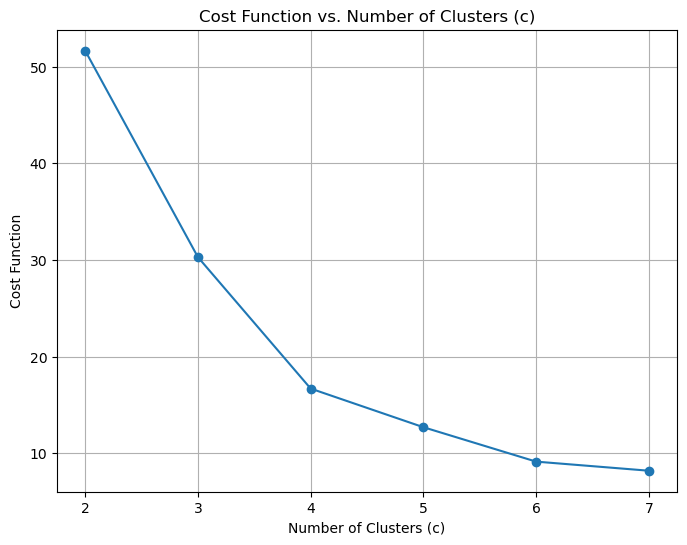

In [12]:
def calculate_cost_function(data, U, V):
    n_samples = len(data)
    n_clusters = len(V)
    cost = 0.0

    for i in range(n_samples):
        for j in range(n_clusters):
            cost += (U[i][j] ** 2) * calculate_euclidean_distance(data[i], V[j]) ** 2

    return cost

if __name__ == "__main__":
    data = [(0,4), (0,3), (1,5), (2,4), (3,3), (2,2), (2,1), (1,0), (5,5), (6,5), (7,6), (5,3),(7,3),(6,2),(6,1),(8,1)] 

    # FCM Parameters
    max_c = 7  # Maximum number of clusters to try
    m = 2.0     # Fuzziness parameter
    max_iter = 100  # Maximum number of iterations
    tol = 1e-5   # Convergence tolerance

    cost_functions = []  # List to store cost functions for different c

    for c in range(2, max_c + 1):
        U, V = fcm(data, c, max_iter, m, tol)
        cost = calculate_cost_function(data, U, V)
        cost_functions.append(cost)

    # Plot cost functions for different c values
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_c + 1), cost_functions, marker='o')
    plt.title("Cost Function vs. Number of Clusters (c)")
    plt.xlabel("Number of Clusters (c)")
    plt.ylabel("Cost Function")
    plt.grid(True)
    plt.show()

    